<a href="https://colab.research.google.com/github/Gbell26/Tensor_Flow2.0_Course/blob/main/TF2_0_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
#load in data
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
#(num samples N, num features D)
data.data.shape

(569, 30)

In [ ]:
# only 0s, 1s so binary classification problem
# When multi class problem w/ k classes labels will be 0,1,2,.. k-1
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
#What is 0 & 1?
#0 = malignant
#1 = benign
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.target.shape

(569,)

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [ ]:
N, D = X_train.shape
N, D

(381, 30)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
#Alternative
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1,input_shape=(D,), activation='sigmoid)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 26ms/step - loss: 0.3606 - accuracy: 0.8871 - val_loss: 0.3758 - val_accuracy: 0.8777
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.3350 - accuracy: 0.8976 - val_loss: 0.3511 - val_accuracy: 0.8936
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3132 - accuracy: 0.9081 - val_loss: 0.3298 - val_accuracy: 0.8989
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2946 - accuracy: 0.9160 - val_loss: 0.3114 - val_accuracy: 0.9043
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2783 - accuracy: 0.9160 - val_loss: 0.2955 - val_accuracy: 0.9043
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2639 - accuracy: 0.9160 - val_loss: 0.2817 - val_accuracy: 0.9149
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2516 - accuracy: 0.9265 - val_loss: 0.2692 - val_accuracy: 0.9149
Epoch 8/100


In [ ]:
print("Train score: ", model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.0773 - accuracy: 0.9816
Train score:  [0.07734519243240356, 0.9816272854804993]
6/6 [==============================] - 0s 4ms/step - loss: 0.0857 - accuracy: 0.9787
Test score:  [0.0857207328081131, 0.978723406791687]


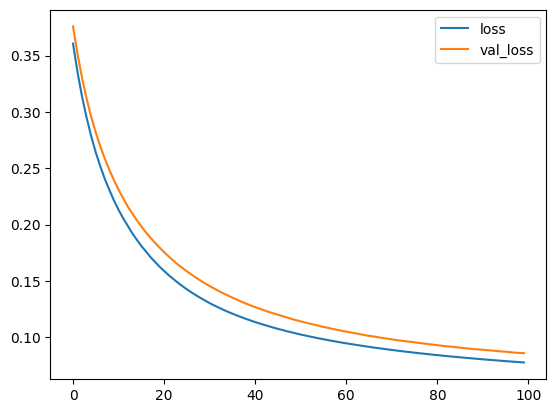

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend();

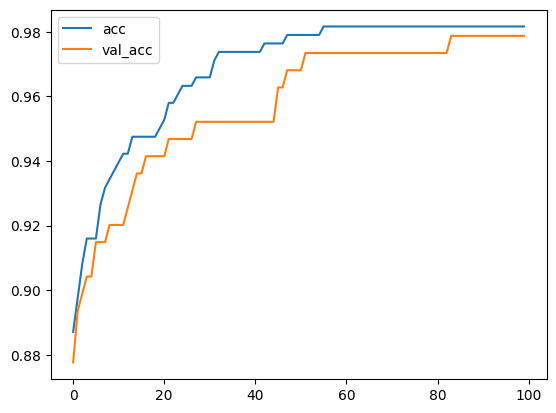

In [ ]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend();

In [ ]:
# Make predictions with the model
P = model.predict(X_test)
print(P)

6/6 [==============================] - 0s 2ms/step
[[9.95778918e-01]
 [2.34902464e-02]
 [9.98861849e-01]
 [6.56730088e-04]
 [6.99310243e-01]
 [1.51794234e-06]
 [1.16382398e-06]
 [9.52333272e-01]
 [9.94927645e-01]
 [9.51853037e-01]
 [8.68734300e-01]
 [9.99951065e-01]
 [6.60295029e-07]
 [1.68983825e-02]
 [9.92984772e-01]
 [9.61972415e-01]
 [9.76484179e-01]
 [9.99065220e-01]
 [9.12188947e-01]
 [8.87549102e-01]
 [9.57360327e-01]
 [1.21141456e-01]
 [9.98874307e-01]
 [1.34742659e-04]
 [9.67678905e-01]
 [5.09825395e-06]
 [9.98964489e-01]
 [1.67334020e-01]
 [3.42358649e-02]
 [6.70646696e-05]
 [2.56435192e-06]
 [5.55492878e-01]
 [9.93661463e-01]
 [6.92819178e-01]
 [9.52273250e-01]
 [9.95232999e-01]
 [4.10816781e-02]
 [2.73074606e-03]
 [4.21105373e-09]
 [5.51622179e-06]
 [9.98541355e-01]
 [9.96815264e-01]
 [9.86908257e-01]
 [8.40633631e-01]
 [4.71521122e-03]
 [9.97723818e-01]
 [3.72837833e-03]
 [7.21806467e-01]
 [4.12562937e-02]
 [1.26679376e-01]
 [1.62502989e-01]
 [9.97298181e-01]
 [3.13409313e

In [ ]:
#Round to get actual predictions
# Has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.]


In [ ]:
# calculate the accuracy compare it to evaluate() output
print("Manually calculated accuracy: ", np.mean(P==y_test))
print("Evaluate output: ", model.evaluate(X_test, y_test))

# Evaluate output: [loss, accuracy]

Manually calculated accuracy:  0.9787234042553191
6/6 [==============================] - 0s 2ms/step - loss: 0.0857 - accuracy: 0.9787
Evaluate output:  [0.0857207328081131, 0.978723406791687]


In [ ]:
# Saving and loading model
model.save('linearclassifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  20K Dec 21 16:12 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Dec 19 14:20 sample_data


In [ ]:
model = tf.keras.models.load_model('linearclassifier.h5')

In [ ]:
print(model.layers)

In [ ]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0857 - accuracy: 0.9787


[0.0857207328081131, 0.978723406791687]